In [49]:
##Importing all needed libraries
try:
    # Summit-related imports
    import summit
    from summit import Runner
    from summit.benchmarks import SnarBenchmark
    from summit.domain import *
    from summit.utils.dataset import DataSet
    from summit.strategies import SOBO, MultitoSingleObjective, LHS

    # External libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # File and path handling
    import pathlib
    import os
    import logging
    import re

except ModuleNotFoundError as e:
    print(f"Error: {e}. Please install the required libraries before running the program.")


In [2]:
exp = SnarBenchmark()
exp.domain
# Create some test conditions
columns = [v.name for v in exp.domain.variables]
values  =   {('tau', 'DATA'): 1.45,  # minutes
             ('equiv_pldn', 'DATA'): 1.825,
             ('conc_dfnb', 'DATA'): 0.1075, #molar
             ('temperature', 'DATA'): 103.5, # degrees celsius
            }
conditions = DataSet([values], columns=columns)

# Run the conditions
exp.reset()
results = exp.run_experiments(conditions)
results.round(2)

,tau,equiv_pldn,conc_dfnb,temperature,sty,e_factor,computation_t,experiment_t,strategy
0,1.45,1.82,0.11,103.5,809.65,40.79,0.0,0.001543,NaN


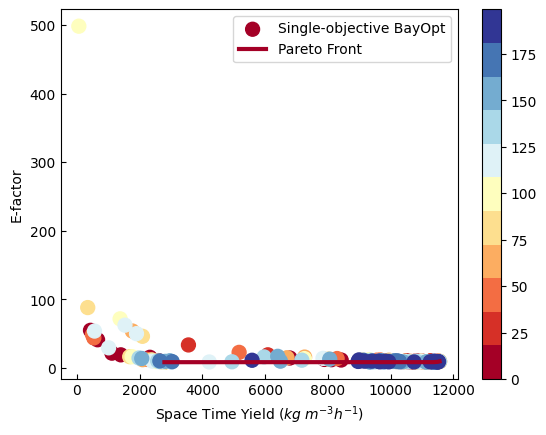

In [3]:
exp = SnarBenchmark()

# Since the Snar benchmark has two objectives and SOBO is single objective,
# we need a multi-to-single objective transform
transform = MultitoSingleObjective(
    exp.domain, expression="-sty/1e4+e_factor/100", maximize=False
)

# Set up the strategy, passing in the optimisation domain and transform
strategy = SOBO(exp.domain, transform=transform)

# Use the runner to run closed loop optimisation
r = Runner(
    strategy=strategy, experiment=exp,max_iterations=200
)
r.run()

# Plot the results
fig, ax = exp.pareto_plot(colorbar=True)
_ = ax.set_xlabel('Space Time Yield ($kg \; m^{-3} h^{-1}$)')
_ = ax.set_ylabel('E-factor')

In [4]:
exp.pareto_data

,tau,equiv_pldn,conc_dfnb,temperature,sty,e_factor,computation_t,experiment_t,strategy
87,2.0,1.0,0.5,93.581901,2790.106834,8.614629,8.342622,0.004599,Single-objective BayOpt
111,0.5,1.721255,0.5,70.505891,11401.605231,8.677262,9.617476,0.001961,Single-objective BayOpt
120,0.5,2.236811,0.5,52.56386,11415.835688,8.860154,9.071491,0.002801,Single-objective BayOpt
167,0.5,2.677989,0.5,51.275634,11479.101903,8.967482,4.082361,0.002927,Single-objective BayOpt
196,0.5,2.956102,0.5,48.604274,11488.831015,9.06205,3.360084,0.002915,Single-objective BayOpt
130,0.5,3.590836,0.5,39.458286,11520.019358,9.271124,9.693433,0.002099,Single-objective BayOpt
185,0.5,3.813368,0.5,38.280911,11529.228312,9.345029,9.669923,0.001819,Single-objective BayOpt
50,0.5,4.478006,0.5,35.55569,11542.875506,9.577773,7.71421,0.003578,Single-objective BayOpt
128,0.5,5.0,0.5,31.39974,11561.051201,9.754309,12.206526,0.00281,Single-objective BayOpt


In [5]:
sty = [5605.716826, 11261.543986, 11422.67426, 11498.714507, 11512.859893, 11527.960561, 11559.605122]
e_factor = [8.56926, 8.585645, 8.899835, 9.081535, 9.431257, 9.525013, 9.756261]

# Calculating the expression for each pair of values
results = []
for s, e in zip(sty, e_factor):
    result = -s / 1e4 + e / 100
    results.append(result)

# Finding the index of the minimum result
min_index = results.index(min(results))

# Printing the minimum result and corresponding values
print("Minimum result:", min(results))
print("Corresponding sty:", sty[min_index])
print("Corresponding e_factor:", e_factor[min_index])


Minimum result: -1.0590561007000001
Corresponding sty: 11498.714507
Corresponding e_factor: 9.081535


In [30]:
# Read the CSV file and skip the second row
file_path = "/home/chaubt/Bao_Research/ChemistryOptimization/DataSets/ExpandDigiTwin/Data/ExpandDigiTwin_Data.csv"
data_df = DataSet.read_csv(file_path)

In [31]:
data_df

,tau,equiv_pldn,conc_dfnb,temperature,strategy,sty,e_factor
0,1.45,1.825,0.1075,103.5,LHS,NaN,NaN
1,1.35,1.075,0.2275,97.5,LHS,NaN,NaN
2,1.65,1.525,0.1375,94.5,LHS,NaN,NaN
3,1.05,1.975,0.1525,112.5,LHS,NaN,NaN
4,1.25,2.425,0.2425,100.5,LHS,NaN,NaN
5,1.95,2.125,0.1225,115.5,LHS,NaN,NaN
6,1.55,1.675,0.2125,118.5,LHS,NaN,NaN
7,1.75,1.225,0.1975,106.5,LHS,NaN,NaN
8,1.15,2.275,0.1675,91.5,LHS,NaN,NaN
9,1.85,1.375,0.1825,109.5,LHS,NaN,NaN


In [161]:
# Read the CSV file and skip the second row
file_path = "/home/chaubt/Bao_Research/ChemistryOptimization/DataSets/ExpandDigiTwin/Data/ExpandDigiTwin_Data.csv"
data_df = DataSet.read_csv(file_path)

# Create SnarBenchmark instance
exp = SnarBenchmark()

# Initialize an empty list to store results
results_list = []

# Iterate over each row in the DataFrame
for index, row in data_df.iterrows():
    # Extract condition values from the DataFrame row
    values = {
        ('tau', 'DATA'): row['tau'],
        ('equiv_pldn', 'DATA'): row['equiv_pldn'],
        ('conc_dfnb', 'DATA'): row['conc_dfnb'],
        ('temperature', 'DATA'): row['temperature']
    }
    columns = [v.name for v in exp.domain.variables]
    conditions = DataSet([values], columns=columns)
    
    # Run the conditions and append the results to the list
    exp.reset()
    results = exp.run_experiments(conditions)
    results_list.append(results)

# Concatenate results from all runs
final_results = pd.concat(results_list, ignore_index=True)

# Round the results
final_results = final_results.round(2)

# Update 'sty' and 'e_factor' columns in the original DataFrame
data_df['sty'] = final_results['sty']
data_df['e_factor'] = final_results['e_factor']

# Save the updated DataFrame to the same CSV file
data_df.to_csv(file_path)

print("Updated CSV file saved.")

Updated CSV file saved.


In [162]:
data_df

,tau,equiv_pldn,conc_dfnb,temperature,strategy,sty,e_factor
0,1.45,1.825,0.1075,103.5,LHS,809.649191,40.790807
1,1.35,1.075,0.2275,97.5,LHS,1874.951415,18.866384
2,1.65,1.525,0.1375,94.5,LHS,933.945902,31.038367
3,1.05,1.975,0.1525,112.5,LHS,1498.636098,30.692791
4,1.25,2.425,0.2425,100.5,LHS,1758.463268,22.565474
5,1.95,2.125,0.1225,115.5,LHS,572.790008,43.261636
6,1.55,1.675,0.2125,118.5,LHS,1297.75934,24.142947
7,1.75,1.225,0.1975,106.5,LHS,1261.380083,21.653169
8,1.15,2.275,0.1675,91.5,LHS,1553.079554,27.185257
9,1.85,1.375,0.1825,109.5,LHS,1061.595351,24.41298
